Following and modified the following tutorial here: 
https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

Note that this idea was paused because it's quite long and fairly awkward for saving.    

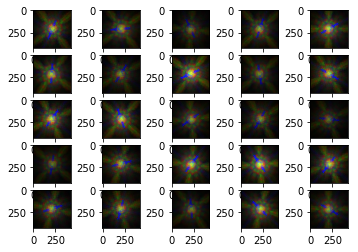

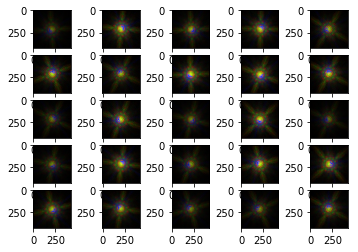

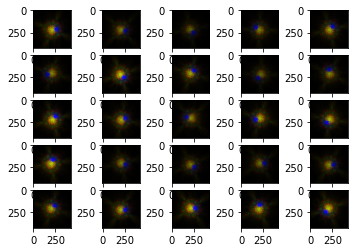

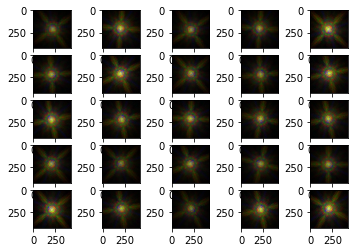

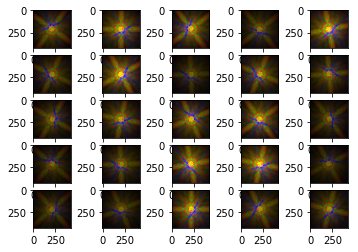

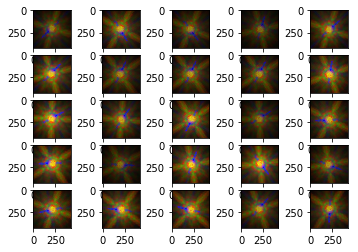

In [97]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os

DATADIR = '/Users/lancastro/Desktop/Alice/brightstars/' #folder containing your data
SRCDIR = '/Users/lancastro/Desktop/Alice/preview' #folder where you want your images to be saved

n = 0 # count value for testing, so the same thing doesn't run through the whole file, but only 
      # the first number of pictures
    
for file in os.listdir(DATADIR):
    img = load_img('%s/%s' % (DATADIR, file))
    data = img_to_array(img)
    
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    
    # create image data augmentation generator
    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, 
                                 rotation_range=359, brightness_range=[0.4,1.0], 
                                 zoom_range=[0.5, 0.5])
    
    # prepare iterator
    it = datagen.flow(samples, batch_size=15)
    
    # generate samples and plot
    for i in range(25):
        # define subplot
        pyplot.subplot(5,5, i+1)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        pyplot.imshow(image)
    # show the figure
    pyplot.show()
    
    n += 1
    if n > 5:
        break
    
    

In [22]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os

DATADIR = '/Users/lancastro/Desktop/Alice/test_folder_stars' #folder containing your data
SRCDIR = '/Users/lancastro/Desktop/Alice/preview' #folder where you want your images to be saved

datagen = ImageDataGenerator(width_shift_range=0.058, height_shift_range=0.058,
                             horizontal_flip=True
                            )

            #ImageDataGenerator(width_shift_range=0.058, height_shift_range=0.058)
i = 1
# batch seems to mean the number of augmentations per image... I think.
for batch in datagen.flow_from_directory(DATADIR, target_size=(424, 424), batch_size=15, save_to_dir=SRCDIR, 
                                     save_prefix='brightstars', save_format='.jpeg'):

    i += 1
    if i > 50: # saves i x batch number of images
        break  # otherwise the generator would loop indefinitely 

Found 228 images belonging to 1 classes.
